In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/life-expectancy-who/Life Expectancy Data.csv


# Importing Required Libraries & Dependencies

In [2]:
import numpy as np

import pandas as pd

In [3]:
from math import ceil

from scipy.stats import pearsonr, spearmanr, kendalltau, chi2_contingency

In [4]:
import seaborn as sns

import matplotlib.pyplot as plt

In [5]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Loading Dataset¶


In [6]:
life_expectancy = pd.read_csv('/kaggle/input/life-expectancy-who/Life Expectancy Data.csv')

In [7]:
life_expectancy.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.000,263.000,62,0.010,71.280,65.000,1154,...,6.000,8.160,65.000,0.100,584.259,33736494.000,17.200,17.300,0.479,10.100
1,Afghanistan,2014,Developing,59.900,271.000,64,0.010,73.524,62.000,492,...,58.000,8.180,62.000,0.100,612.697,327582.000,17.500,17.500,0.476,10.000
2,Afghanistan,2013,Developing,59.900,268.000,66,0.010,73.219,64.000,430,...,62.000,8.130,64.000,0.100,631.745,31731688.000,17.700,17.700,0.470,9.900
3,Afghanistan,2012,Developing,59.500,272.000,69,0.010,78.184,67.000,2787,...,67.000,8.520,67.000,0.100,669.959,3696958.000,17.900,18.000,0.463,9.800
4,Afghanistan,2011,Developing,59.200,275.000,71,0.010,7.097,68.000,3013,...,68.000,7.870,68.000,0.100,63.537,2978599.000,18.200,18.200,0.454,9.500


In [8]:
life_expectancy.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

# Data Pre-Processing¶

In [9]:
# To remove extra trailing spaces (beginning and end) from column names
life_expectancy.columns = life_expectancy.columns.str.strip()

In [10]:
life_expectancy.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [11]:
life_expectancy.columns = life_expectancy.columns.str.lower()

In [12]:
life_expectancy.columns

Index(['country', 'year', 'status', 'life expectancy', 'adult mortality',
       'infant deaths', 'alcohol', 'percentage expenditure', 'hepatitis b',
       'measles', 'bmi', 'under-five deaths', 'polio', 'total expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness  1-19 years',
       'thinness 5-9 years', 'income composition of resources', 'schooling'],
      dtype='object')

In [13]:
life_expectancy.dtypes

country                             object
year                                 int64
status                              object
life expectancy                    float64
adult mortality                    float64
infant deaths                        int64
alcohol                            float64
percentage expenditure             float64
hepatitis b                        float64
measles                              int64
bmi                                float64
under-five deaths                    int64
polio                              float64
total expenditure                  float64
diphtheria                         float64
hiv/aids                           float64
gdp                                float64
population                         float64
thinness  1-19 years               float64
thinness 5-9 years                 float64
income composition of resources    float64
schooling                          float64
dtype: object

In [14]:
life_expectancy['year'] = life_expectancy['year'].astype(str) 

In [15]:
life_expectancy.dtypes

country                             object
year                                object
status                              object
life expectancy                    float64
adult mortality                    float64
infant deaths                        int64
alcohol                            float64
percentage expenditure             float64
hepatitis b                        float64
measles                              int64
bmi                                float64
under-five deaths                    int64
polio                              float64
total expenditure                  float64
diphtheria                         float64
hiv/aids                           float64
gdp                                float64
population                         float64
thinness  1-19 years               float64
thinness 5-9 years                 float64
income composition of resources    float64
schooling                          float64
dtype: object

In [16]:
# numerical_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

# life_expectancy_numeric = life_expectancy.select_dtypes(include=numerical_types)

In [17]:
# life_expectancy_numeric.columns

# Correlation

---

Correlation measures the strength and direction of the linear relationship between two continuous variables.


## Types of correlation

---

### 1. Positive Correlation

Two variables exhibit a positive correlation when their values change in the same direction. For instance, as the value of 𝑋 increases, the value of 𝑌 also increases at a consistent rate.

### 2. Negative Correlation

A negative correlation occurs when two variables move in opposite directions. In this case, as the value of 𝑋 increases, the value of 𝑌 decreases at a consistent rate.

### 3. Neutral Correlation

Neutral correlation describes a situation where there is no apparent relationship between two variables. The values of 𝑋 and 𝑌 change independently, showing no discernible pattern or connection.

## Correlation coefficients

- A correlation coefficient is a numerical measure that quantifies the strength and direction of the relationship between two variables. 

- It provides a standardized way to evaluate how closely two variables are associated.

- Key Characteristics
    - Range: The correlation coefficient always falls between -1.0 and 1.0.
        - 1.0: Perfect positive correlation (variables move in the same direction).
        - -1.0: Perfect negative correlation (variables move in opposite directions).
        - 0.0: No correlation (no relationship between variables).


In [18]:
life_expectancy.fillna(life_expectancy.mean(numeric_only=True), inplace=True)

In [19]:
target = 'life expectancy'

In [20]:
# Select numeric columns excluding the target
numeric_columns = [column for column in life_expectancy.select_dtypes(include=['number']).columns if column != target]

In [21]:
# Determining grid size (number of rows and columns)
num_cols = len(numeric_columns)
grid_cols = 2

# Calculating rows
grid_rows = ceil(num_cols / grid_cols) 

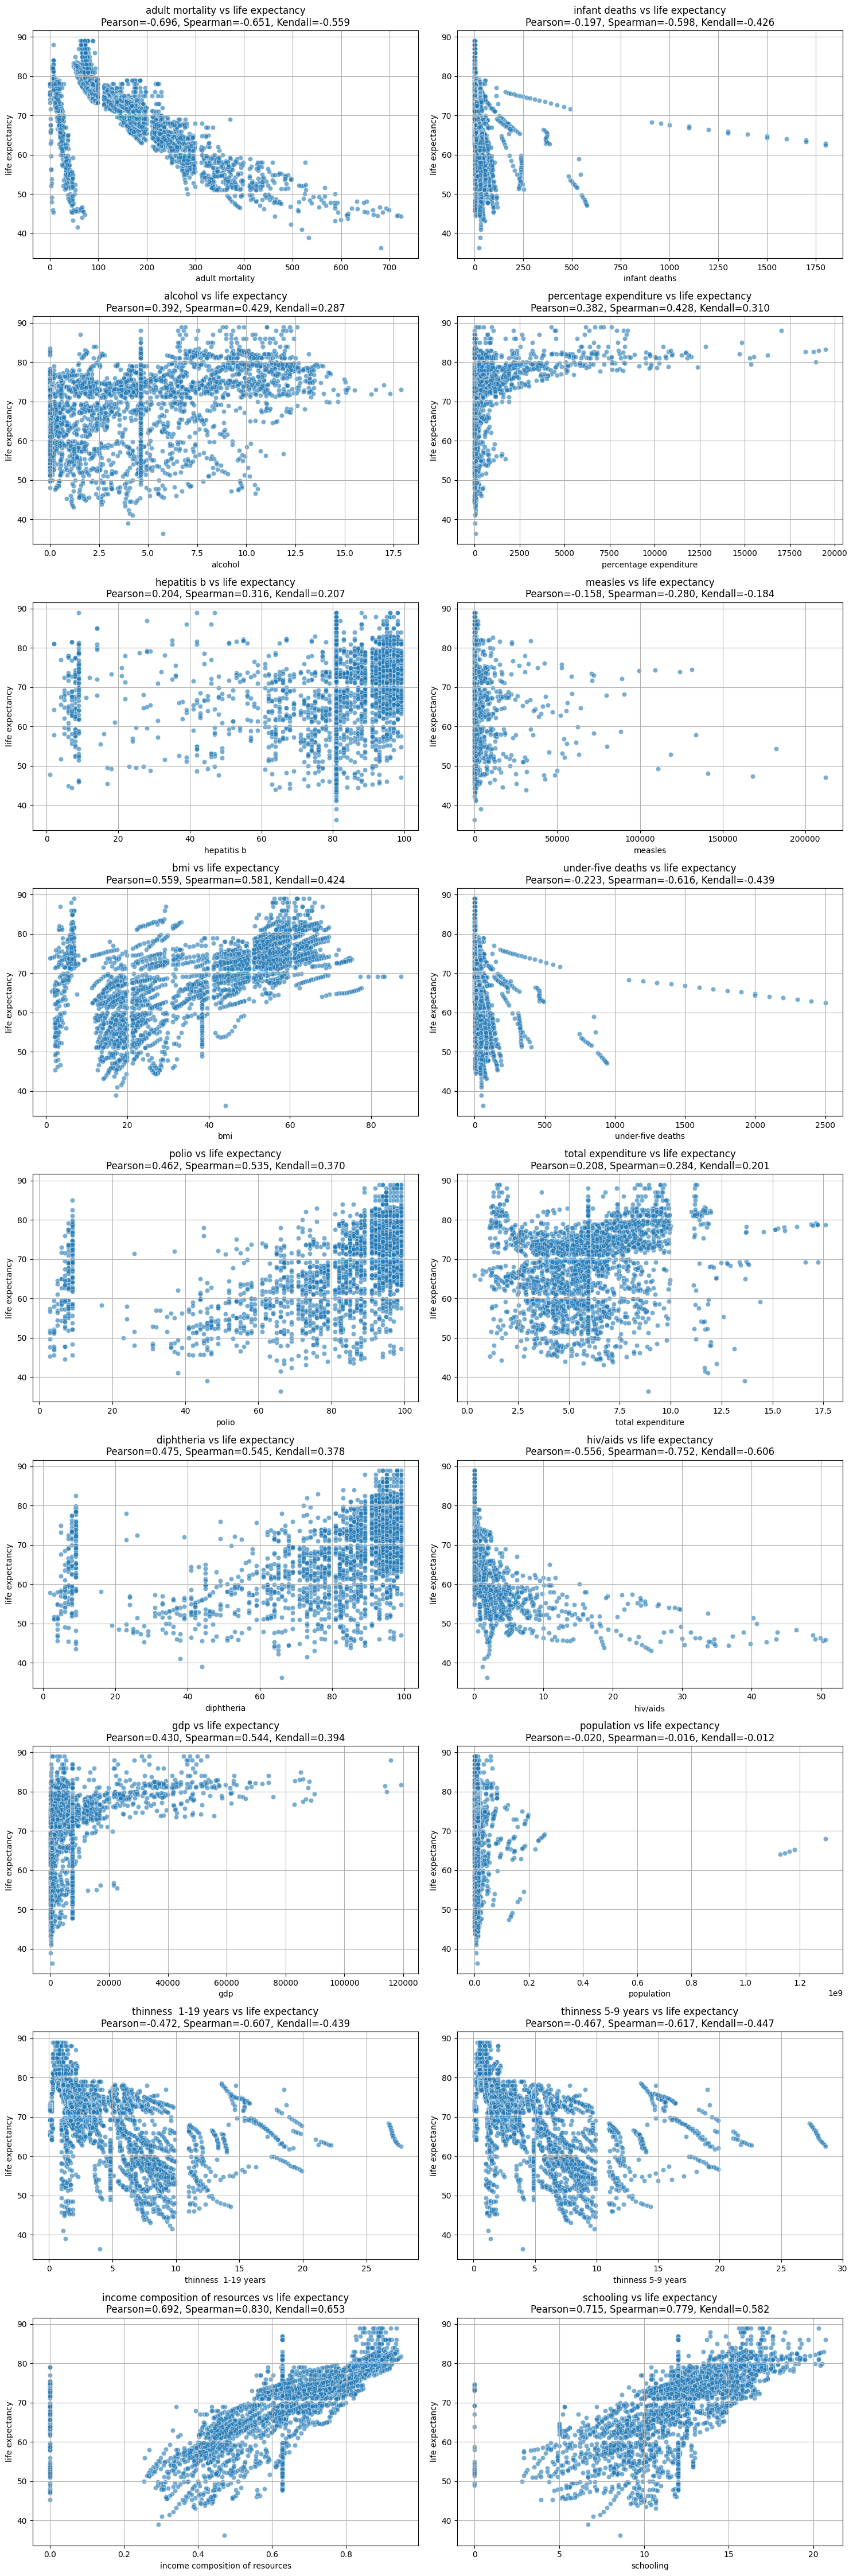

In [22]:
fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(15, grid_rows * 5))
axes = axes.flatten()

# Plotting each numeric column against the target

for i, col in enumerate(numeric_columns):
    
    pearson_corr, _ = pearsonr(life_expectancy[col], life_expectancy[target])
    spearman_corr, _ = spearmanr(life_expectancy[col], life_expectancy[target])
    kendall_corr, _ = kendalltau(life_expectancy[col], life_expectancy[target])

    # Scatter plot
    sns.scatterplot(ax=axes[i], x=life_expectancy[col], y=life_expectancy[target], alpha=0.6)
    axes[i].set_title(
        f'{col} vs {target}\nPearson={pearson_corr:.3f}, Spearman={spearman_corr:.3f}, Kendall={kendall_corr:.3f}'
    )
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(target)
    axes[i].grid()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [23]:
# Select numeric columns
numeric_columns = life_expectancy.select_dtypes(include=['number'])

## Pearson's correlation coefficient

The Pearson's correlation coefficient (r) is a score that measures the strength of a linear relationship between two variables

The coefficient is based on two assumptions. First, it assumes that the variables follow a normal or gaussian distribution. If the data is not normally distributed, then other coefficients may be more reliable.

Second, it assumes that there is a linear relationship between the two variables, meaning that the changes in the data can be modelled using a linear function (i.e. their values increase or decrease simultaneously at a constant rate)

It is important to highlight that a Pearson's correlation coefficient close to 0.0 only indicates that there is no linear relationship between the variables. But it could happen that there is a strong, non-linear relationship instead. If a relationship between two variables is nonlinear, the rate of increase or decrease may change as one variable changes, drawing a curve-like pattern in the data. Such a trend could be better modeled by a nonlinear function, such as a quadratic or cubic function.

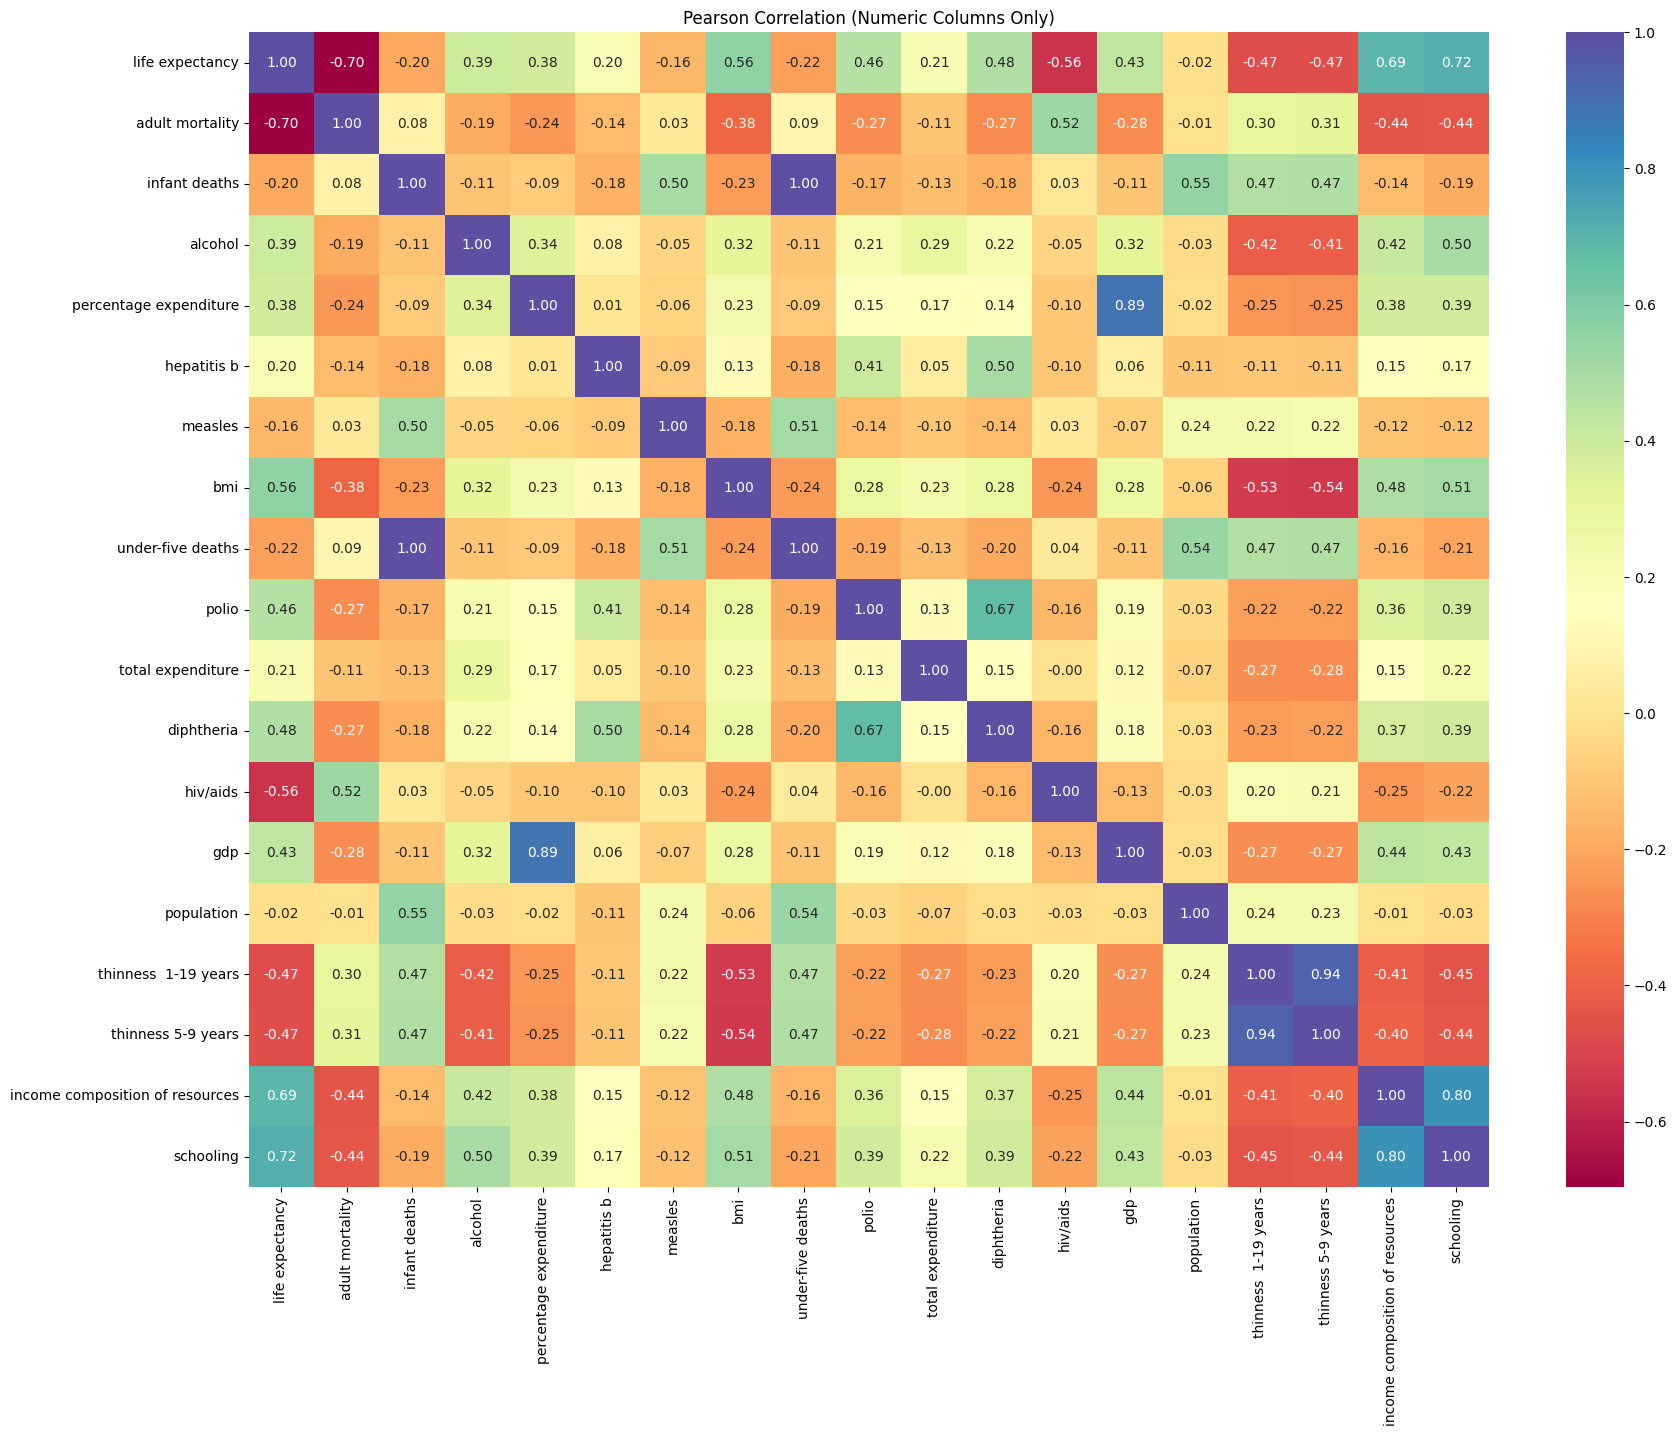

In [24]:
# Calculate Pearson correlation for numeric columns
pearson_corr_matrix = numeric_columns.corr(method='pearson')

# Pearson Correlation Heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(pearson_corr_matrix, annot=True, fmt=".2f", cmap="Spectral")
plt.title('Pearson Correlation (Numeric Columns Only)')
plt.show()

## Spearman's correlation coefficient


- Spearmans correlation coefficient, denoted as 𝜌 (rho), is a non-parametric measure of rank correlation. 
- It assesses the strength and direction of the monotonic relationship between two variables, making it suitable for both linear and non-linear associations.
- Unlike Pearson's correlation, Spearman's 𝜌 operates on the ranks of the data rather than their actual values.
- Each variable is converted to ranks, and the correlation is calculated based on these ranks.
    - ρ=1: Perfect positive monotonic relationship (as one variable increases, the other increases).

    - ρ=−1: Perfect negative monotonic relationship (as one variable increases, the other decreases).

    - ρ=0: No monotonic relationship between the variables.
 
- Measures monotonic relationships, meaning the variables tend to move in the same or opposite direction, though not necessarily at a constant rate.

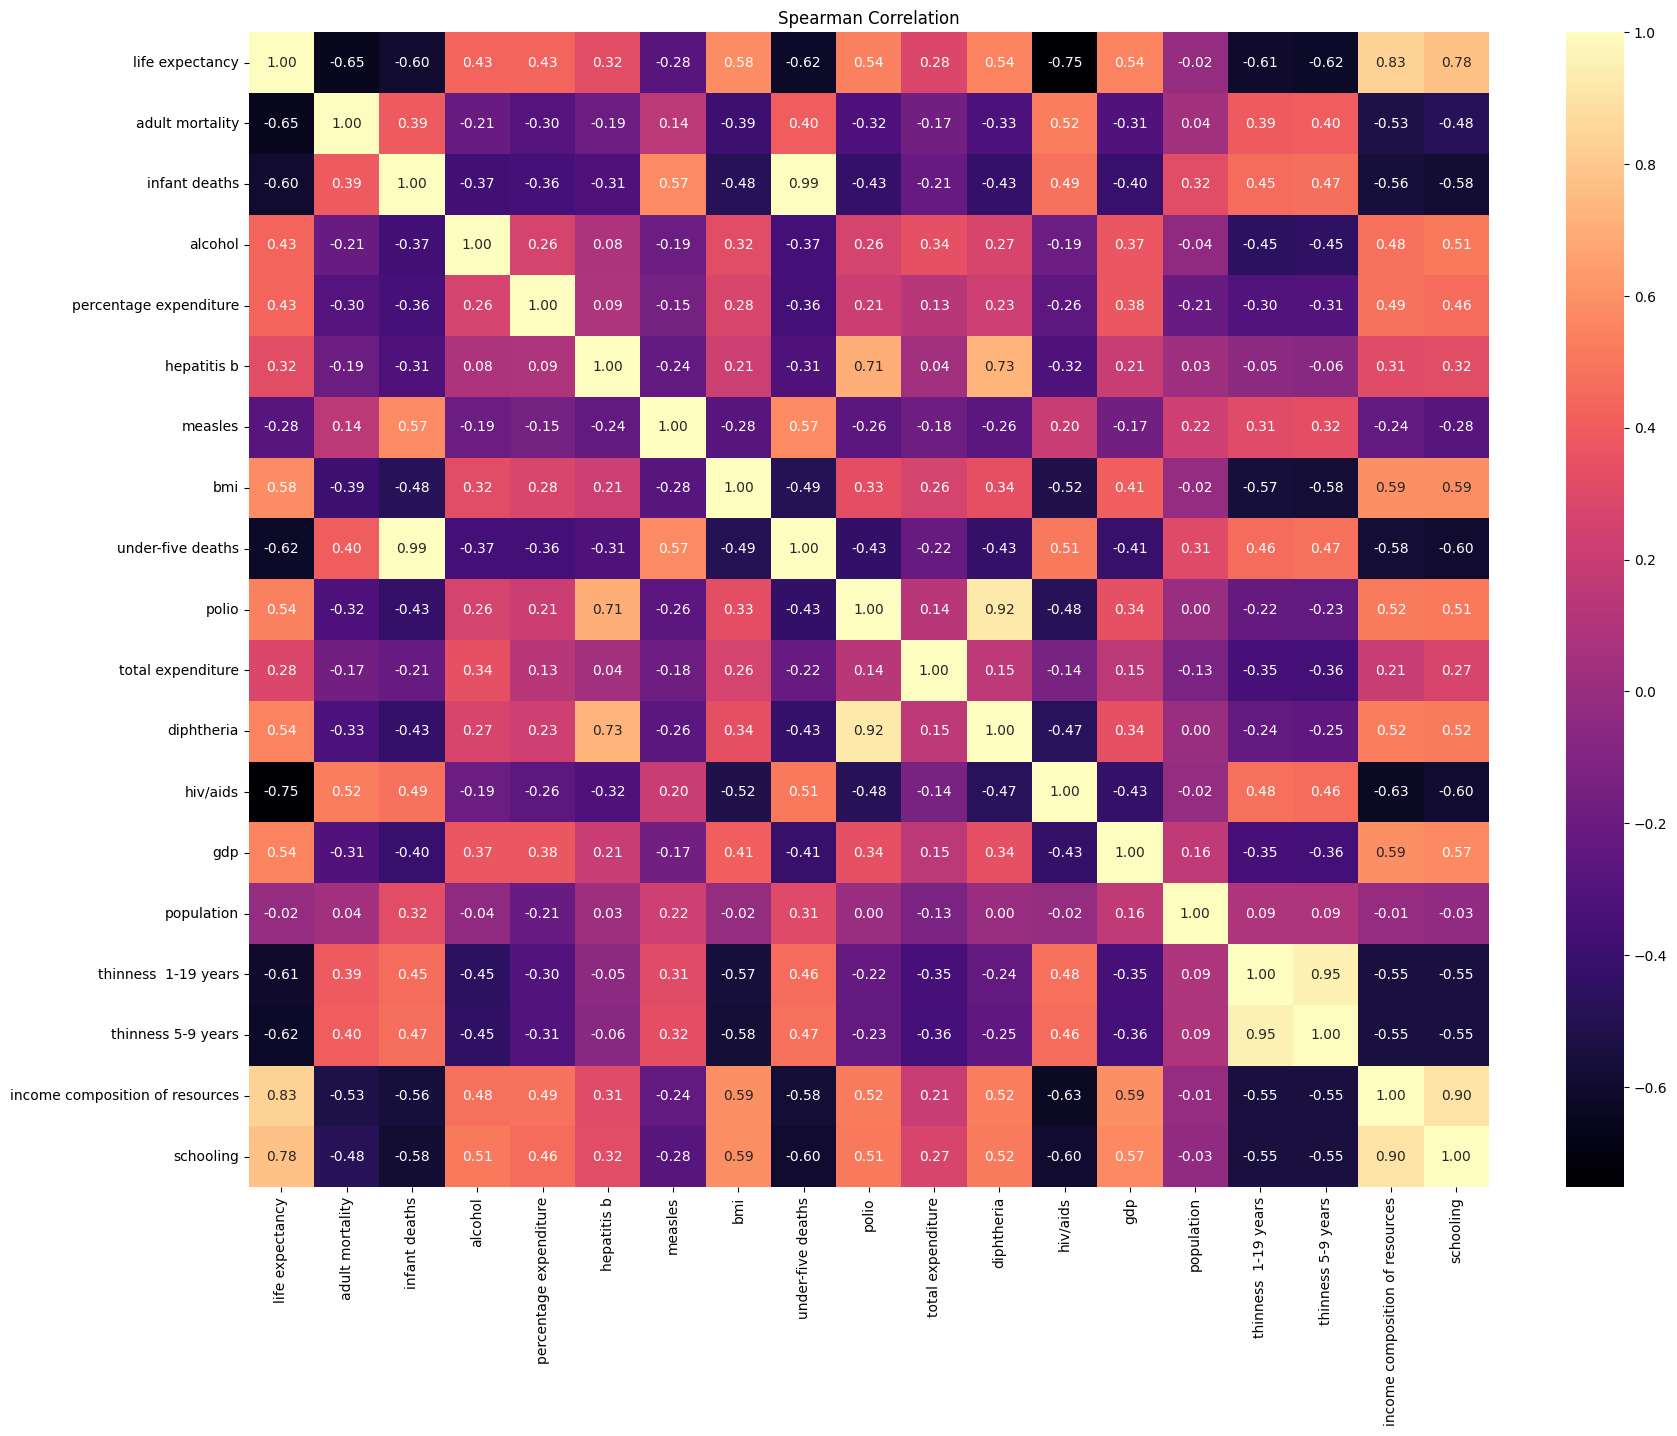

In [25]:
spearman_correlation_matrix = numeric_columns.corr(method='spearman')

# Spearman Correlation Heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(spearman_correlation_matrix, annot=True, fmt=".2f", cmap="magma")
plt.title('Spearman Correlation')
plt.show()

## Kendall's correlation coefficient

- Kendall's correlation coefficient, denoted as 
𝜏 is a statistic used to measure the strength and direction of the ordinal association between two variables. 

- It is particularly useful for assessing monotonic relationships and is robust to non-linear associations.

- Unlike Pearson correlation, Kendall's 𝜏 does not work with the actual values of the variables but instead uses their ranks.

- It evaluates the similarity of the ordering of data points between two variables.

    - τ=1: Perfect positive association (as one variable increases, the other increases).

    - τ=−1: Perfect negative association (as one variable increases, the other decreases).

    - τ=0: No association (the variables are independent).

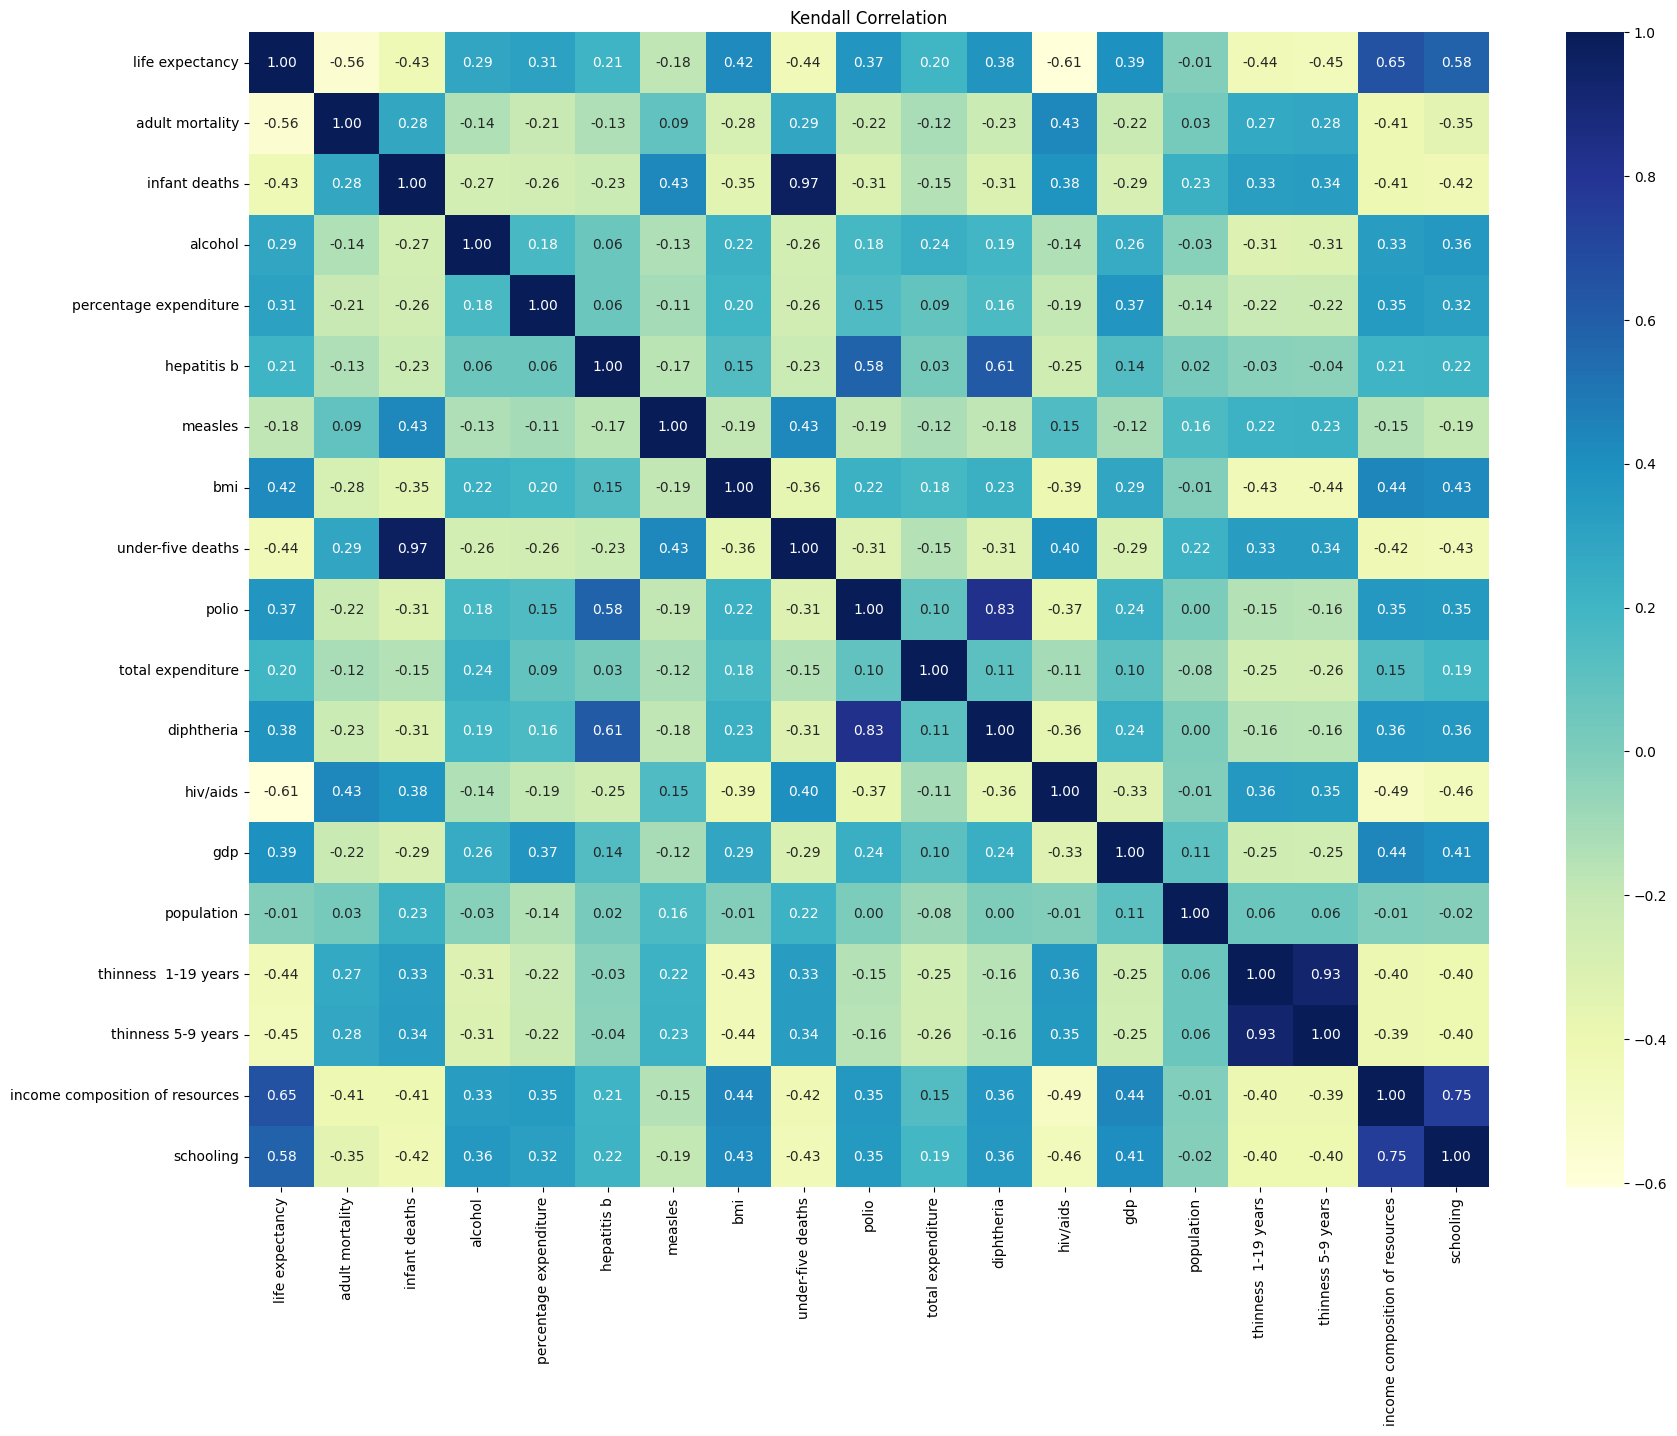

In [26]:
kendall_correlation_matrix = numeric_columns.corr(method='kendall')

# Kendall Correlation Heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(kendall_correlation_matrix, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Kendall Correlation')
plt.show()

In a monotonic relationship, the variables tend to move in the same relative direction, but not necessarily at a constant rate. In other words, every linear relationship is monotonic, but not every monotonic relationship is linear.

As with the Pearson correlation coefficient, the scores of Spearman's and Kendall's coefficients are between -1 and 1 for perfectly negatively correlated variables and perfectly positively correlated, respectively.

However, data scientists can generally stick to Pearson's correlation coefficient. The appeal of rank-based estimates is mostly for smaller data sets and specific hypothesis tests.



## Comparison of Correlation Coefficients

| **Feature**             | **Kendall's τ**   | **Spearman's ρ**   | **Pearson's r**    |
|--------------------------|-------------------|--------------------|--------------------|
| **Data Type**           | Ordinal           | Ordinal            | Continuous         |
| **Monotonicity**        | Yes               | Yes                | No                 |
| **Linearity Assumption**| No                | No                 | Yes                |
| **Outlier Sensitivity** | Low               | Moderate           | High               |


# Association

---

Association refers to a statistical relationship between two categorical variables. It measures the strength and nature of the relationship but does not imply causation. 



### Key Features of Association

- **Measures Relationship:** Indicates whether changes in one variable are related to changes in another.
Suitable for categorical data.

- **Not Causal:** A significant association does not imply that one variable causes the other to change.

- **Non-Parametric:** Does not assume specific data distributions, making it versatile for categorical data.

## Cross-Tabulation

---

Cross-tabulation is a method to examine the relationship between two categorical variables by creating a contingency table. This provides a summary of the frequency distribution of variables and helps in understanding potential associations.

In [27]:
cross_tab = pd.crosstab(life_expectancy['year'], life_expectancy['status'])

cross_tab


status,Developed,Developing
year,,
2000,32,151
2001,32,151
2002,32,151
2003,32,151
2004,32,151
2005,32,151
2006,32,151
2007,32,151
2008,32,151


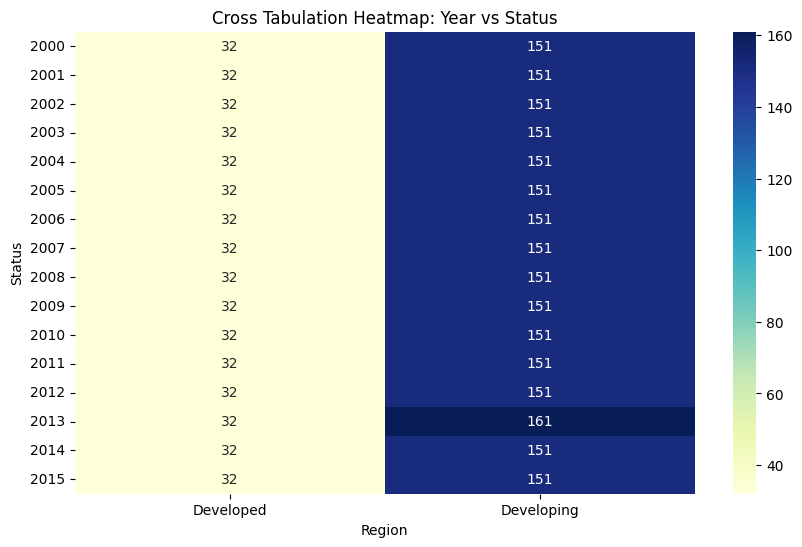

In [28]:
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Cross Tabulation Heatmap: Year vs Status')
plt.ylabel('Status')
plt.xlabel('Region')
plt.show()

**Perform Chi-Squared Test**

A Chi-Squared test can be applied to the cross-tabulation to determine if the association between the two categorical variables is statistically significant.

In [29]:
chi2, p, dof, expected = chi2_contingency(cross_tab)

# Display results
print(f"Chi-Squared Statistic: {chi2:.3f}")
print(f"p-value: {p:.3f}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-Squared Statistic: 0.103
p-value: 1.000
Degrees of Freedom: 15
Expected Frequencies:
[[ 31.89108237 151.10891763]
 [ 31.89108237 151.10891763]
 [ 31.89108237 151.10891763]
 [ 31.89108237 151.10891763]
 [ 31.89108237 151.10891763]
 [ 31.89108237 151.10891763]
 [ 31.89108237 151.10891763]
 [ 31.89108237 151.10891763]
 [ 31.89108237 151.10891763]
 [ 31.89108237 151.10891763]
 [ 31.89108237 151.10891763]
 [ 31.89108237 151.10891763]
 [ 31.89108237 151.10891763]
 [ 33.63376447 159.36623553]
 [ 31.89108237 151.10891763]
 [ 31.89108237 151.10891763]]


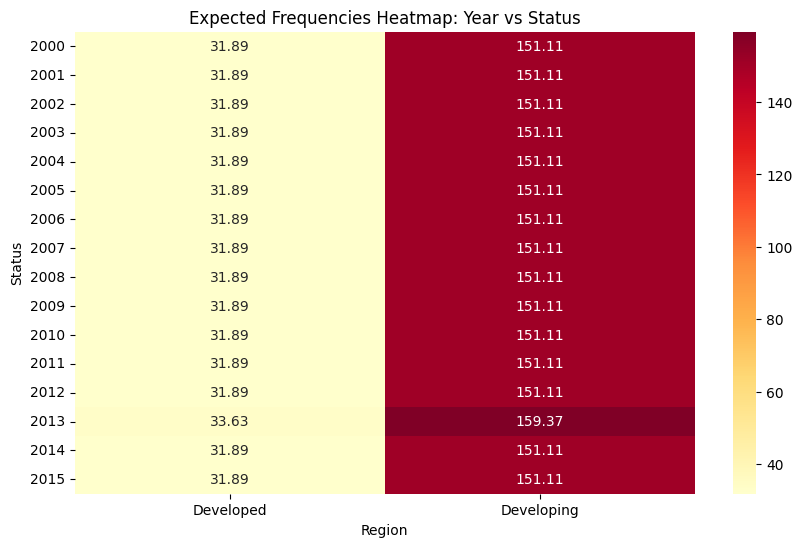

In [30]:
expected_df = pd.DataFrame(expected, index=cross_tab.index, columns=cross_tab.columns)

plt.figure(figsize=(10, 6))
sns.heatmap(expected_df, annot=True, fmt=".2f", cmap='YlOrRd')
plt.title('Expected Frequencies Heatmap: Year vs Status')
plt.ylabel('Status')
plt.xlabel('Region')
plt.show()


## Cramér's V 

---

Cramér's 𝑉 is a statistical measure that quantifies the strength of the association between two categorical variables. It is derived from the Chi-Squared test and provides a normalized value that ranges from 0 to 1, where:

- 0: Indicates no association.
- 1: Indicates a perfect association.

This makes Cramér's 𝑉 particularly useful for comparing associations across different datasets or categorical variables of varying sizes.


Cramér's 𝑉 is often used when:

- Analyzing the relationship between two categorical variables (e.g., gender and product preference).
- Comparing the strength of associations across multiple pairs of variables.

In [31]:
categorical_columns = life_expectancy.select_dtypes(include=['object', 'category']).columns

categorical_columns

Index(['country', 'year', 'status'], dtype='object')

In [32]:
def cramers_v(confusion_matrix):
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    k = min(confusion_matrix.shape)
    return np.sqrt(chi2 / (n * (k - 1)))

In [33]:
# Creating a DataFrame to store results
association_results = []

for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 != col2:
            
            # Contingency table
            contingency_table = pd.crosstab(life_expectancy[col1], life_expectancy[col2])

            # Chi-Squared test
            chi2, p, _, _ = chi2_contingency(contingency_table)

            # Cramér's V
            cramers_value = cramers_v(contingency_table)

            association_results.append({
                'Variable 1': col1,
                'Variable 2': col2,
                'Chi-Squared': chi2,
                'p-value': p,
                'Cramér\'s V': cramers_value
            })

In [34]:
association_df = pd.DataFrame(association_results)
association_df

,Variable 1,Variable 2,Chi-Squared,p-value,Cramér's V
0,country,year,142.714,1.000,0.057
1,country,status,2938.000,0.000,1.000
2,year,country,142.714,1.000,0.057
3,year,status,0.103,1.000,0.006
4,status,country,2938.000,0.000,1.000
5,status,year,0.103,1.000,0.006


In [35]:
# Creating matrix for Cramér's V
cramers_v_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 != col2:
            contingency_table = pd.crosstab(life_expectancy[col1], life_expectancy[col2])
            cramers_v_matrix.loc[col1, col2] = cramers_v(contingency_table)
        else:
            cramers_v_matrix.loc[col1, col2] = 1.0

In [36]:
# Converting to numeric 
cramers_v_matrix = cramers_v_matrix.astype(float)

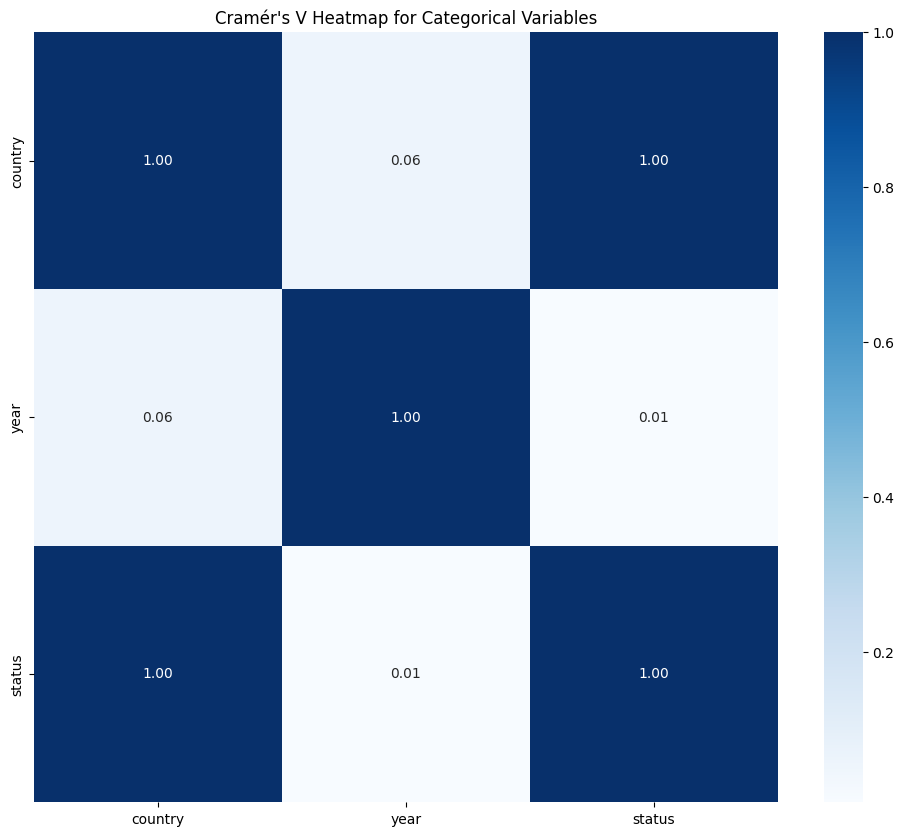

In [37]:
# Plotting heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cramers_v_matrix, annot=True, fmt=".2f", cmap="Blues", cbar=True)
plt.title("Cramér's V Heatmap for Categorical Variables")
plt.show()

### Difference Between Correlation and Association

| **Aspect**               | **Correlation**                                      | **Association**                                      |
|---------------------------|-----------------------------------------------------|-----------------------------------------------------|
| **Definition**            | Measures the strength and direction of a linear or monotonic relationship between two variables. | Measures the relationship between two variables, usually categorical, without implying direction. |
| **Data Type**             | Primarily for numeric or ordinal data.              | Primarily for categorical data.                     |
| **Key Metrics**           | Pearson’s \( r \), Spearman’s \( \rho \), Kendall’s \( \tau \). | Chi-Squared, Cramér’s \( V \).                      |
| **Directionality**        | Indicates the direction of the relationship (positive or negative). | Does not indicate direction, only strength.         |
| **Linearity Assumption**  | Yes, for Pearson's \( r \). Spearman and Kendall do not assume linearity. | No linearity assumption.                            |
| **Monotonicity**          | Assessed by Spearman's and Kendall’s coefficients.  | Not typically assessed in association measures.     |
| **Data Dependency**       | Works with continuous or ordinal data to assess monotonic/linear relationships. | Works with categorical data to assess relationships via contingency tables. |
| **Sensitivity to Outliers** | High for Pearson’s \( r \); Moderate for Spearman’s \( \rho \) and Kendall’s \( \tau \). | Low sensitivity to outliers.                        |
| **Purpose**               | Determines how well one variable predicts or relates to another in a numerical sense. | Explores statistical relationships without prediction. |
| **Examples**              | Relationship between height and weight (numeric data). | Relationship between gender and preference (categorical data). |


**Source**

- [Datacamp](https://www.datacamp.com/tutorial/tutorial-datails-on-correlation?utm_source=google&utm_medium=paid_search&utm_campaignid=19589720824&utm_adgroupid=157156375671&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=724847714791&utm_targetid=aud-1685385913382:dsa-2218886984580&utm_loc_interest_ms=&utm_loc_physical_ms=9215214&utm_content=&utm_campaign=230119_1-sea~dsa~tofu_2-b2c_3-row-p2_4-prc_5-na_6-na_7-le_8-pdsh-go_9-nb-e_10-na_11-na-dec24&gad_source=1&gclid=Cj0KCQiA9667BhDoARIsANnamQaZHUh8jTfrtKzcjeKUWROaDu9npRBAuKiT40vuUky9OOkezR9Quo8aAmgHEALw_wcB)